# Usando regressão linear para previsão de valores

Será utilizado o LinearRegression do linear_model e assim sendo possível prever os dados.

In [0]:
import pandas as pd

dados = pd.read_csv("regressao_linear_alura.csv")

In [3]:
dados.head()

,movieId,Titulo,Investimento (em milhoes),Bilheteria (pessoas)
0,1,Toy Story (1995),11.048216,5623234.602
1,2,Jumanji (1995),14.927678,5714951.757
2,3,Grumpier Old Men (1995),27.114597,9524339.124
3,4,Waiting to Exhale (1995),4.994242,6331568.779
4,5,Father of the Bride Part II (1995),19.142246,6409617.277


In [0]:
from sklearn.model_selection import train_test_split


In [0]:
investimento = dados['Investimento (em milhoes)']
bilheteria = dados['Bilheteria (pessoas)']

In [0]:
import matplotlib.pyplot as plt

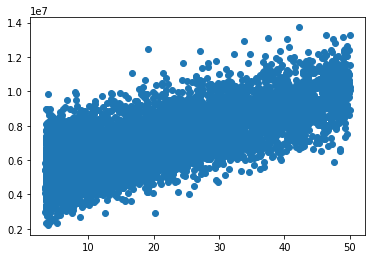

In [7]:
plt.scatter(investimento, bilheteria)

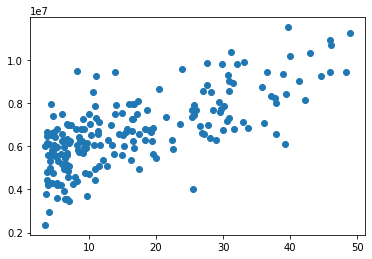

In [8]:
sample = dados.sample(200)
x = sample['Investimento (em milhoes)']
y = sample['Bilheteria (pessoas)']
plt.scatter(x, y)

In [0]:
treino_invest, teste_invest, treino_bilheteria, teste_bilheteria = train_test_split(investimento, bilheteria)

In [0]:
import numpy as np

treino_invest = np.array(treino_invest).reshape(len(treino_invest), 1)
teste_invest = np.array(teste_invest).reshape(len(teste_invest), 1)
treino_bilheteria = np.array(treino_bilheteria).reshape(len(treino_bilheteria), 1)
teste_bilheteria = np.array(teste_bilheteria).reshape(len(teste_bilheteria), 1)

In [11]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(treino_invest, treino_bilheteria)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
modelo.intercept_

array([5053835.67252516])

In [13]:
modelo.score(teste_invest, teste_bilheteria)

0.521384163685913

# Aplicação do Linear Regression com uma quantidade maior de dados para maior acurácia.

In [15]:
import pandas as pd

dados_completos = pd.read_csv('movies_multilinear_reg.csv')
dados_completos.head(5)

,movieId,Titulo,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento,Bilheteria
0,1,Toy Story (1995),0,0,0,0,0,0,0,1,1,1,1,0,1,103.468310,11.048216,5623234.602
1,2,Jumanji (1995),0,0,0,0,0,0,0,1,0,0,1,0,1,112.337916,14.927678,5714951.757
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,1,0,0,0,0,116.245732,27.114597,9524339.124
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,0,1,0,0,1,0,120.317732,4.994242,6331568.779
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,110.023572,19.142246,6409617.277


In [0]:
dados_independentes = dados_completos[dados_completos.columns[2:17]]
dados_dependetes = dados_completos[dados_completos.columns[17:]]


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

treino_x, teste_x, treino_bilheteria, teste_bilheteria = train_test_split(
                                                                          dados_independentes, 
                                                                          dados_dependetes,
                                                                          test_size = 0.3
                                                                          )


modelo = LinearRegression()
modelo.fit(treino_x, treino_bilheteria)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
modelo.score(treino_x, treino_bilheteria)

0.8265605842495385

In [19]:
modelo.score(teste_x, teste_bilheteria)

0.8300569611080975

In [20]:
zootopia = [0,0,0,0,0,0,0,0,1,1,1,0,1,145.5170642,3.451632127]
modelo.predict([zootopia])

array([[7014619.10713846]])

In [21]:
apes_planet = [0,1,0,0,0,0,0,0,0,0,0,0,0,150,5]
modelo.predict([apes_planet])

array([[7387780.9630579]])

# Usando método regressão logistica para classificar dados

Obs: Importante ver a proporção de itens para cada labels a ser avaliada. Todas para serem utilizada de maneira efetiva no aprendizado, devem conter mais ou menos a mesma proporção, que no caso aqui será 80%-20%

In [0]:
import pandas as pd

dados_filmes = pd.read_csv("avaliacoes_usuario.csv")

In [0]:
dados_independentes = dados_filmes[dados_filmes.columns[1:-1]]
dados_dependentes = dados_filmes[dados_filmes.columns[-1:]]

In [0]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(dados_independentes, dados_dependentes, test_size = 0.1)

In [0]:
from sklearn.linear_model import LogisticRegression
import numpy as np

train_x = np.array(train_x).reshape(len(train_x), 15)
test_x = np.array(test_x).reshape(len(test_x), 15)

train_y = train_y.values.ravel()
test_y = test_y.values.ravel()


In [0]:
modelo = LogisticRegression()

modelo.fit(train_x, train_y)
modelo.score(test_x, test_y)

In [0]:
previsoes = modelo.predict(test_x)

In [29]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(test_y, previsoes)
acuracia

0.7794117647058824

In [30]:
from sklearn.naive_bayes import GaussianNB

modeloNB = GaussianNB()

modeloNB.fit(train_x, train_y)
modeloNB.score(test_x, test_y)

0.7352941176470589

In [0]:
zootopia = [0,0,0,0,0,0,0,1,1,1,1,0,1,110,27.74456356]

In [34]:
modelo.predict([zootopia])

array([1])

# Usando árvore de decisão e utilizando DecisionTreeRegressor para classificação de dados

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

dados_filmes = pd.read_csv('movies_multilinear_reg.csv')


In [0]:
filmes_caract = dados_filmes[dados_filmes.columns[2:17]]
filmes_labels = dados_filmes[dados_filmes.columns[17:]]

In [37]:
filmes_caract.head()

,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento
0,0,0,0,0,0,0,0,1,1,1,1,0,1,103.468310,11.048216
1,0,0,0,0,0,0,0,1,0,0,1,0,1,112.337916,14.927678
2,0,0,0,0,1,0,0,0,1,0,0,0,0,116.245732,27.114597
3,0,0,0,0,1,0,0,0,1,0,0,1,0,120.317732,4.994242
4,0,0,0,0,0,0,0,0,1,0,0,0,0,110.023572,19.142246


In [0]:
train_caract, test_caract, train_labels, test_labels = train_test_split(filmes_caract, filmes_labels)

In [0]:
train_caract = np.array(train_caract).reshape(len(train_caract), 15)
test_caract = np.array(test_caract).reshape(len(test_caract), 15)

train_labels = np.array(train_labels).reshape(len(train_labels), 1)
test_labels = np.array(test_labels).reshape(len(test_labels), 1)

In [40]:
modelo = tree.DecisionTreeRegressor(max_depth=5)
modelo.fit(train_caract, train_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [41]:
modelo.score(train_caract, train_labels)

0.8091388330215421

In [42]:
modelo.score(test_caract, test_labels)

0.7876476510654481

In [0]:
zootopia = [0,0,0,0,0,0,0,1,1,1,1,0,1,110,27.74456356]

In [44]:
modelo.predict([zootopia])

array([7812817.71668947])

# Usando Decision Tree Classification para classificação de dados

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

dados = pd.read_csv('avaliacoes_usuario.csv')
dados.head()

,Titulo,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento,Gostou
0,Nixon (1995),0,0,0,0,0,0,0,0,0,0,0,1,0,114.496547,7.930748,1
1,Leaving Las Vegas (1995),0,0,0,0,1,0,0,0,0,0,0,1,0,110.140191,18.276555,1
2,Persuasion (1995),0,0,0,0,1,0,0,0,0,0,0,1,0,105.747597,16.582232,1
3,Babe (1995),0,0,0,0,0,0,0,0,0,0,1,1,0,126.131978,13.004553,1
4,Carrington (1995),0,0,0,0,1,0,0,0,0,0,0,1,0,85.025469,14.418120,1


In [46]:
filmes_caract = dados[dados.columns[1:-1]]
filmes_class = dados[dados.columns[-1:]]

filmes_class.head()

,Gostou
0,1
1,1
2,1
3,1
4,1


In [47]:
filmes_caract.head()

,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento
0,0,0,0,0,0,0,0,0,0,0,0,1,0,114.496547,7.930748
1,0,0,0,0,1,0,0,0,0,0,0,1,0,110.140191,18.276555
2,0,0,0,0,1,0,0,0,0,0,0,1,0,105.747597,16.582232
3,0,0,0,0,0,0,0,0,0,0,1,1,0,126.131978,13.004553
4,0,0,0,0,1,0,0,0,0,0,0,1,0,85.025469,14.418120


In [0]:
rawtrain_x, rawtest_x, rawtrain_y, rawtest_y = train_test_split(filmes_caract, filmes_class)

train_x = rawtrain_x.to_numpy()
test_x = rawtest_x.to_numpy()

train_y = rawtrain_y.to_numpy()
test_y = rawtest_y.to_numpy()


In [49]:
modelo = tree.DecisionTreeClassifier(max_depth=5)

modelo.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
modelo.score(train_x, train_y)


0.860236220472441

In [51]:
modelo.score(test_x, test_y)

0.7352941176470589

In [52]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor()
model.fit(train_x, train_y.ravel())

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [53]:
model.score(train_x, train_y.ravel())

0.8046441176470589